Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Epoch [10/100], Loss: 0.1671
Epoch [20/100], Loss: 0.1230
Epoch [30/100], Loss: 0.0987
Epoch [40/100], Loss: 0.0883
Epoch [50/100], Loss: 0.0854
Epoch [60/100], Loss: 0.0851
Epoch [70/100], Loss: 0.0852
Epoch [80/100], Loss: 0.0852
Epoch [90/100], Loss: 0.0851
Epoch [100/100], Loss: 0.0851


  0%|          | 0/100 [00:00<?, ?it/s]

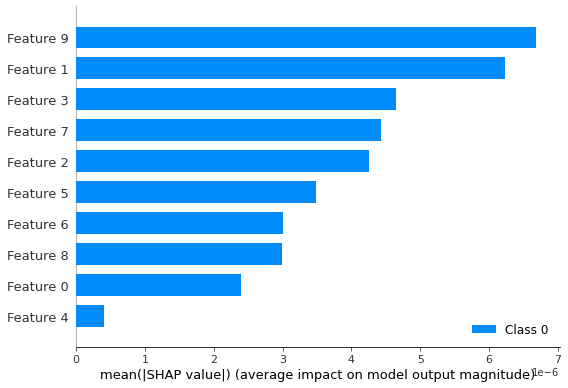

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import shap
import matplotlib.pyplot as plt

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Generate some synthetic data
input_size = 10  # Number of features
hidden_size = 5
output_size = 1
X = np.random.rand(1000, input_size)
y = np.random.rand(1000)

# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Initialize the model, criterion, and optimizer
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
model.train()
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Switch the model to evaluation mode
model.eval()

# Define a prediction function for SHAP
def predict(x):
    with torch.no_grad():
        tensor_x = torch.tensor(x, dtype=torch.float32)
        return model(tensor_x).numpy()

# Create a SHAP explainer
explainer = shap.KernelExplainer(predict, X)

# Compute SHAP values for a sample
shap_values = explainer.shap_values(X[:100])

# Plot the SHAP values
shap.summary_plot(shap_values, X[:100], feature_names=[f'Feature {i}' for i in range(input_size)])

# Show the plot
plt.show()